In [1]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt

In [5]:
import math as m
Euler_constant = round( (1.-m.gamma(1+1.e-8))*1.e14 )*1.e-6

In [12]:
def D(x):
    return 1/x - (1 + 1/x) * np.exp(-2*x)

def D2(x):
    return 1/x - ((1/6)*x**2 + (3/4)*x + 11/8 + 1/x) * np.exp(-2*x)

def X(x):
    return (1 + x) * np.exp(-x)

def I(x):
    return (1 + x + (1/3)*x**2) * np.exp(-x)

def I_bar(x):
    return (1 - x + (1/3)*x**2) * np.exp(x)

def X2(x):
    return (5/8 - (23/20)*x - (3/5)*x**2 - (1/15)*x**3) * np.exp(-2*x) + (6/5) * (1/x) * I(x)**2 * ( Euler_constant + np.log(x) + (I_bar(x)/I(x))**2*sc.expi(-4*x) - 2*(I_bar(x)/I(x))*sc.expi(-2*x) )

In [22]:
x_list = []
energy_list = []
energy_g_list = []

number = 101
for i in range(number):
    x = 0.1 + i*(10.0-0.1)/(number-1)
    energy = (-1) * (2 * ( 1 - (1/x) + (2*D(x) - D2(x) - (2*I(x)*X(x) - X2(x)))/(1 - I(x)**2) ))
    energy_g = (-1) * (2 * ( 1 - (1/x) + (2*D(x) - D2(x) + (2*I(x)*X(x) - X2(x)))/(1 + I(x)**2) ))
    
    x_list.append(x)
    energy_list.append(energy)
    energy_g_list.append(energy_g)


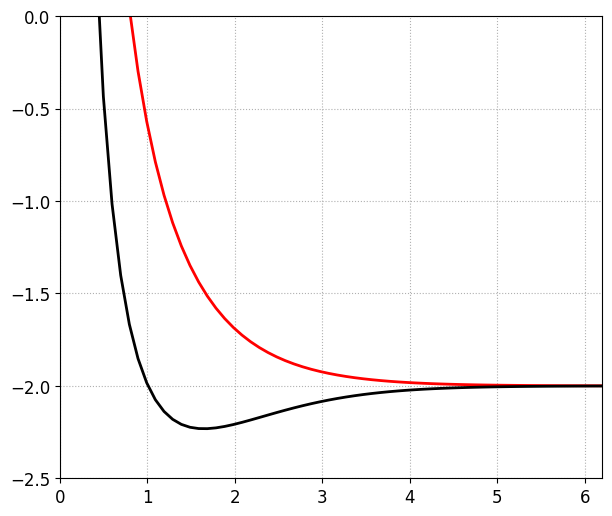

In [23]:
plt.figure(figsize=(7.0, 6.0))

xmin_plot, xmax_plot = 0, 6.2
ymin_plot, ymax_plot = -2.5, 0.0
plt.xlim(xmin_plot, xmax_plot)
plt.ylim(ymin_plot, ymax_plot)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
#plt.xlabel("H-H distance in angstrom", fontsize=13)
#plt.ylabel("Energy in hartree", fontsize=13)

plt.plot(x_list, energy_list, color="red", linestyle="solid", linewidth=2)
plt.plot(x_list, energy_g_list, color="black", linestyle="solid", linewidth=2)

plt.grid(linestyle='dotted')
#plt.legend(loc='best', fontsize=13)
plt.show()